# Executive Summary
## Objective: 
The goal of this project is to analyze retail sales data to identify key customer segments, purchasing trends, and high-performance periods. By leveraging Python for Exploratory Data Analysis (EDA), we aim to provide actionable recommendations to optimize inventory, marketing strategies, and staffing.

### Key Questions to Answer:

 Sales Trends: How do sales vary by month, day, and season?
 Customer Demographics: Who are the primary buyers (Age, Gender)?
Product Performance: Which categories drive the most revenue?
Behavioral Insights: Is there a correlation between customer age and spending?

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.read_csv(r"C:\Users\ELIAS\Desktop\Oasis infobyte\Dataset\customer_shopping_data.csv")
df=pd.read_csv(r"C:\Users\ELIAS\Desktop\Oasis infobyte\Dataset\customer_shopping_data.csv").drop(['Unnamed: 10'], axis=1)

## Dataset info

In [3]:
print(f"info: {df.info}")
print(f"Shape: {df.shape}")

info: <bound method DataFrame.info of       invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3   

In [4]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

Number of Duplicate Rows: 0


In [5]:
#Check for null values
def check_null_values(df):
    null_values= df.isnull().sum().sum()

    if null_values>0:
        return f'Number of null values is {null_values}'
    else:
        return 'No null values. The dataset is ready for analysis'
#check the code
check_null_values(df)

'No null values. The dataset is ready for analysis'

## Exploratory data Analysis

In [6]:
df["payment_method"].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

The payment method that contributes the most to the total Revenue is Cash with 44447 records. This means that the customers prefer to pay more in cash compared to other means of payment.

<Axes: ylabel='count'>

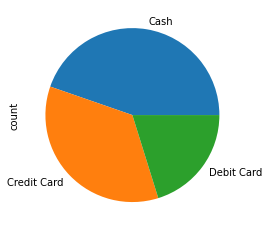

In [7]:
#Variations across payment methods
df["payment_method"].value_counts().plot( kind= 'pie')

In [8]:
df.groupby(["category", "quantity"]).size()

category         quantity
Books            1            985
                 2           1008
                 3           1000
                 4            959
                 5           1029
Clothing         1           6841
                 2           6950
                 3           6907
                 4           6849
                 5           6940
Cosmetics        1           2986
                 2           2974
                 3           3072
                 4           3010
                 5           3055
Food & Beverage  1           3002
                 2           2909
                 3           2992
                 4           2884
                 5           2989
Shoes            1           1944
                 2           2045
                 3           2010
                 4           2022
                 5           2013
Souvenir         1           1024
                 2            984
                 3           1077
                 4    

In [9]:
df["category"].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

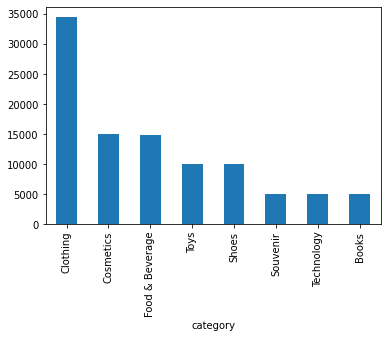

In [10]:
ax=df["category"].value_counts().plot(kind='bar')

## Analysis based on category
With 34487 records the clothing category holds the highest number of purchase. Which indicates that the customers are likely to buy clothes compared to other products.

In [11]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"], dayfirst=True, errors="coerce")
df["month"]=df["invoice_date"].dt.month_name()
df["year"]=df["invoice_date"].dt.year
print(df[["invoice_date", "month", "year"]].head())

  invoice_date     month  year
0   2022-08-05    August  2022
1   2021-12-12  December  2021
2   2021-11-09  November  2021
3   2021-05-16       May  2021
4   2021-10-24   October  2021


In [12]:
#month_order
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]
df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)


In [13]:
#create additional column for total price
df["Amount_generated"]=df["price"] * df["quantity"]

In [14]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,Amount_generated
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,August,2022,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,December,2021,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,November,2021,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,May,2021,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,October,2021,242.40


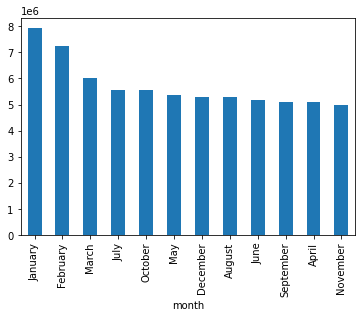

In [15]:
#group by month
category=df.groupby("month")["price"].sum(). sort_values(ascending=False).plot(kind= 'bar')

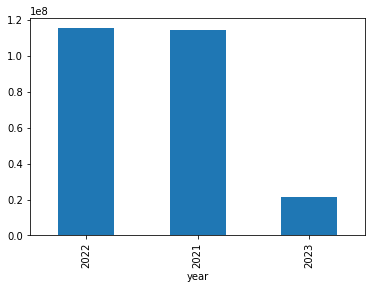

In [16]:
#group by year
category=df.groupby("year")["Amount_generated"].sum(). sort_values(ascending=False).plot(kind= 'bar')

In [17]:
df.groupby('year')['Amount_generated'].value_counts()

year  Amount_generated
2021  4801.28             3214
      2700.72             3210
      300.08              3196
      1200.32             3192
      7502.00             3161
                          ... 
2023  105.57                76
      4200.00               72
      1050.00               71
      242.40                70
      187.68                67
Name: count, Length: 120, dtype: int64

1. The highest revenue was generated in the first month which is January
2. The highest grossing year is 2022

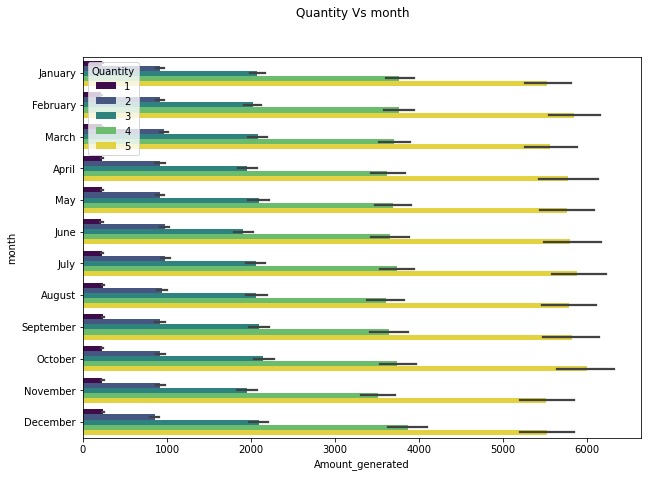

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='Amount_generated', y='month',hue='quantity', palette= 'viridis')
plt.suptitle('Quantity Vs month')
plt.legend(title= 'Quantity', loc='upper left')

People who bought 5 units peaked at October with about 6000($) generated for that month.

In [19]:
#category groupby with a dataframe(category)
category=df.groupby(["category"]).size().sort_values(ascending=False)

In [20]:
category

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
dtype: int64

In [21]:
#Classify age in three main group (Teennager<19, young adult (20-40), old adult>40)
def classify_age(age):
    if age<20:
        return 'Teenager'
    elif 20<= age < 40:
        return 'Young Adult'
    else:
        return 'Old Adult'

In [22]:
df['age'].apply(classify_age)

0        Young Adult
1        Young Adult
2        Young Adult
3          Old Adult
4          Old Adult
            ...     
99452      Old Adult
99453    Young Adult
99454      Old Adult
99455      Old Adult
99456    Young Adult
Name: age, Length: 99457, dtype: object

In [23]:
df['age_group']=df['age'].apply(classify_age)

In [24]:
df. tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,Amount_generated,age_group
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,September,2022,293.25,Old Adult
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,September,2021,20.92,Young Adult
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,March,2021,20.92,Old Adult
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,March,2021,16800.00,Old Adult
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,2022-10-15,Mall of Istanbul,October,2022,105.57,Young Adult


## Classification by Age

In [25]:
df["age_group"].value_counts()

age_group
Old Adult      57127
Young Adult    38550
Teenager        3780
Name: count, dtype: int64

<Axes: title={'center': 'Age group'}, xlabel='age_group'>

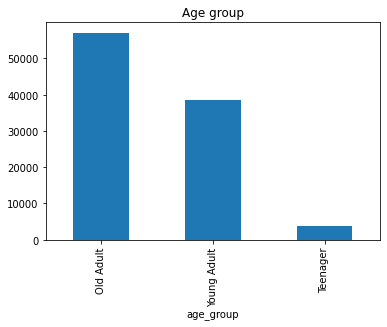

In [26]:
#the graph for age groups variation
df["age_group"].value_counts().plot(kind='bar', title= 'Age group')

The adults purchase more items with a record of 57127 appearances in the whole record. It points to the age group that patronize the company the most, and that is the Adult(Age>40).

In [27]:
df.groupby(["age_group", "category", "gender"]).max()

invoice_no customer_id  age  quantity  \
age_group   category        gender                                         
Old Adult   Books           Female    I998246     C998754   69         5   
                            Male      I999769     C999910   69         5   
            Clothing        Female    I999959     C999995   69         5   
                            Male      I999670     C999631   69         5   
            Cosmetics       Female    I998731     C999810   69         5   
                            Male      I998895     C999032   69         5   
            Food & Beverage Female    I999450     C999363   69         5   
                            Male      I999952     C999886   69         5   
            Shoes           Female    I999868     C999024   69         5   
                            Male      I999311     C999685   69         5   
            Souvenir        Female    I999572     C999683   69         5   
                            Male      I998572     C998880   69         5   
            Technology      Female    I998489     C998781   69         5   
                            Male      I999972     C994118   69         5   
            Toys            Female    I998643     C999976   69         5   
                            Male      I999956     C999586   69         5   
Teenager    Books           Female    I983693     C953323   19         5   
                            Male      I986693     C927132   19         5   
            Clothing        Female    I998874     C984007   19         5   
                            Male      I997951     C997246   19         5   
            Cosmetics       Female    I981852     C990494   19         5   
                            Male      I978250     C986546   19         5   
            Food & Beverage Female    I998421     C997699   19         5   
                            Male      I975873     C987617   19         5   
            Shoes           Female    I984801     C992548   19         5   
                            Male      I907811     C976996   19         5   
            Souvenir        Female    I966240     C940873   19         5   
                            Male      I965374     C973727   19         5   
            Technology      Female    I989853     C974102   19         5   
                            Male      I950920     C995927   19         5   
            Toys            Female    I984329     C960234   19         5   
                            Male      I991507     C970421   19         5   
Young Adult Books           Female    I995692     C998912   39         5   
                            Male      I997944     C991218   39         5   
            Clothing        Female    I998227     C999974   39         5   
                            Male      I999779     C999361   39         5   
            Cosmetics       Female    I999344     C999653   39         5   
                            Male      I998713     C999770   39         5   
            Food & Beverage Female    I999692     C999000   39         5   
                            Male      I999948     C999854   39         5   
            Shoes           Female    I999922     C999457   39         5   
                            Male      I995836     C998904   39         5   
            Souvenir        Female    I999106     C996616   39         5   
                            Male      I999852     C994685   39         5   
            Technology      Female    I999994     C999272   39         5   
                            Male      I999973     C997851   39         5   
            Toys            Female    I998780     C998274   39         5   
                            Male      I996565     C997799   39         5   

                                      price payment_method invoice_date  \
age_group   category        gender                                        
Old Adult   Books           Female    75.75     Debit Card   2023-03-08   
         

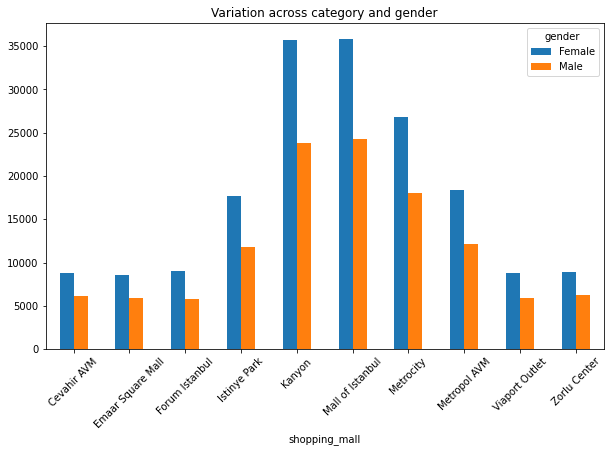

In [28]:
grouped= df.groupby(["shopping_mall", "gender"])["quantity"].sum().unstack()
grouped.plot(kind='bar', figsize=(10,6))
#Changing the graph layout and size
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.title('Variation across category and gender')
plt.tight_layout
plt.show()

The mall of Instanbul generate more money compared to others.

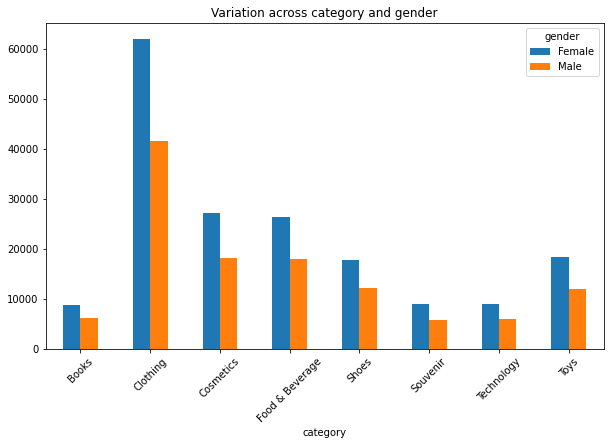

In [29]:
grouped= df.groupby(["category", "gender"])["quantity"].sum().unstack()
grouped.plot(kind='bar', figsize=(10,6))
#Changing the graph layout and size
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.title('Variation across category and gender')
plt.tight_layout
plt.show()

The Female purchase more clothing compared to the male

<Axes: title={'center': 'Variation across gender'}, xlabel='category,gender'>

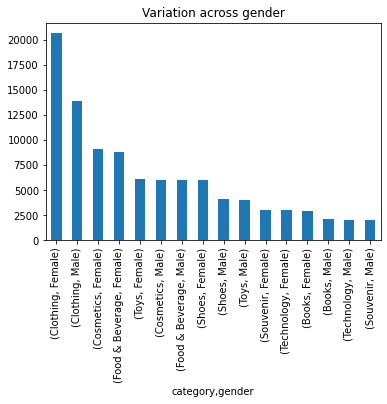

In [30]:
df. groupby(["category", "gender"]).size()
#plot the graph using the new category
df. groupby(["category", "gender"]).size().sort_values(ascending= False).plot(kind='bar', title='Variation across gender')

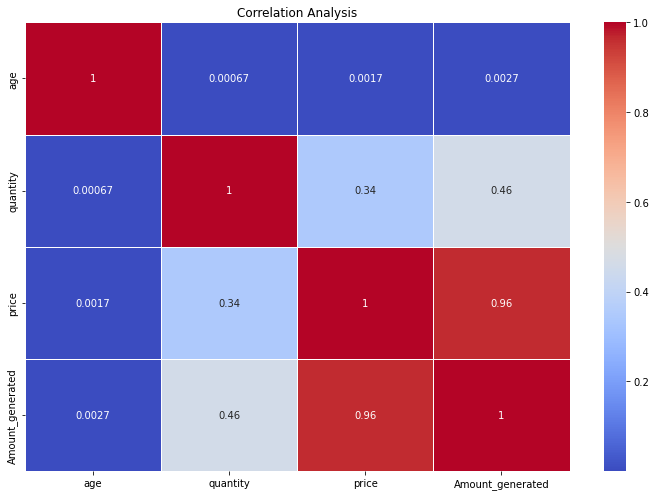

In [31]:

Category= df[["age", "quantity", "price", "Amount_generated"]].corr()
plt.figure(figsize= (10,7))
sns.heatmap(Category, cmap= 'coolwarm', annot=True, linewidth=0.5)
plt.title("Correlation Analysis")
plt.tight_layout()
plt.show()

The highest correlation is between price and amount generated which has a correlation value of 0.96.
There is a very smallcorrelation between age and amount generated. Showing that age is not a major effect on the total amount speny by individuals, but price is a major factor in the decision making process of customers.

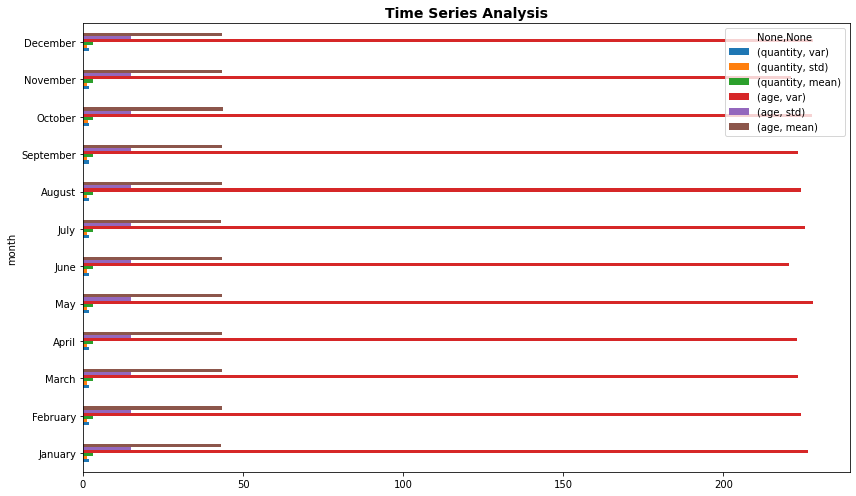

In [32]:
# Time Series Analysis
month_order= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month']=pd.Categorical(df['month'], categories=month_order, ordered= True)
data=df.groupby("month")[["quantity", "age"]].agg({'mean', 'std', 'var'})
data.plot(kind='barh', figsize= (12,7))
plt.title('Time Series Analysis', fontsize=14, fontweight= 'bold')
plt.tight_layout()
plt.show()

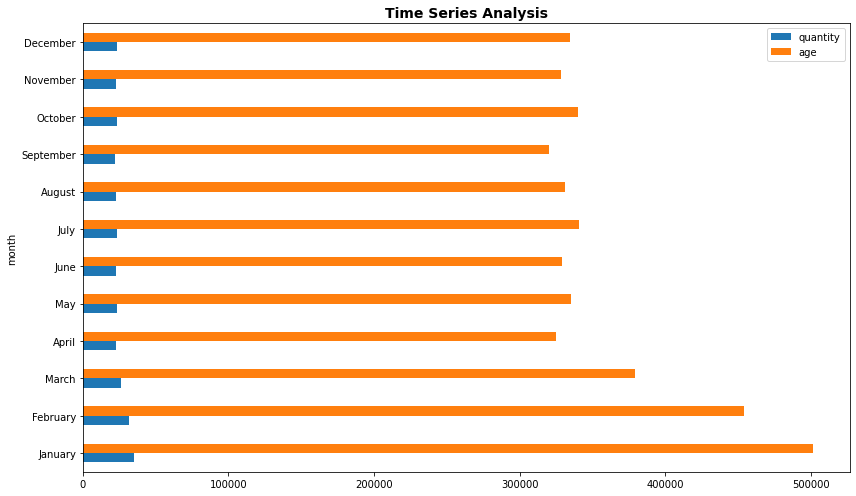

In [33]:
# Time Series Analysis
data=df.groupby("month")[["quantity", "age"]].sum()
data.plot(kind='barh', figsize= (12,7))
plt.title('Time Series Analysis', fontsize=14, fontweight= 'bold')
plt.tight_layout()
plt.show()

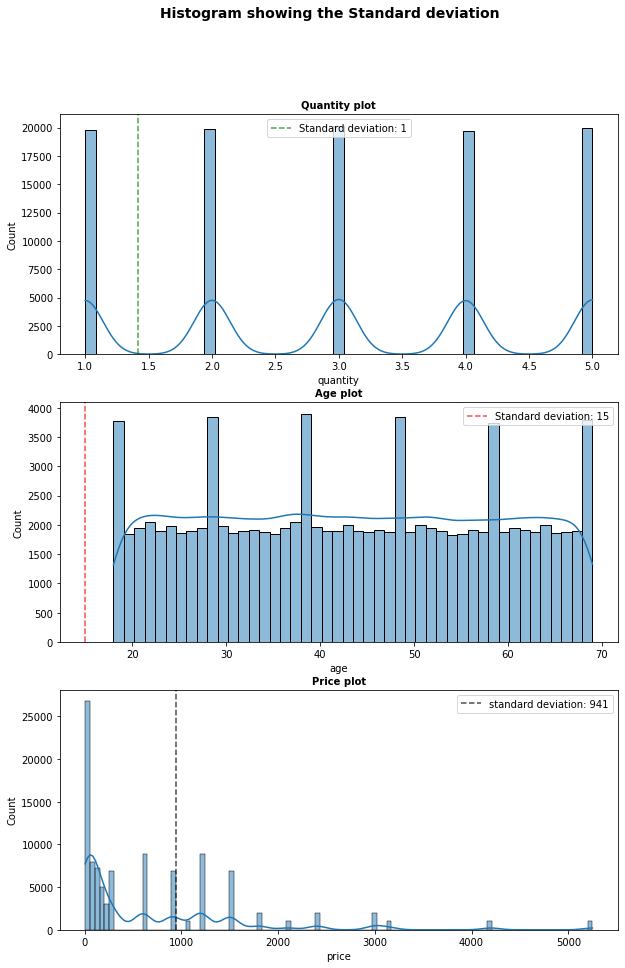

In [34]:

#Create a 3*1 Subplots
fig, axes= plt.subplots(3, figsize= (10,15))
plt.suptitle("Histogram showing the Standard deviation", fontweight= 'bold', fontsize=14)

#Create a Relationship between the values
sns.histplot(df['quantity'],kde=True, ax=axes[0])
axes[0].set_title('Quantity plot', fontsize=10, fontweight= 'bold')
axes[0]. axvline(df['quantity'].std(), linestyle='--', color= 'green', alpha= 0.7, label= f'Standard deviation: {df["quantity"].std():.0f}')
axes[0]. legend()

sns.histplot(df['age'], ax=axes[1], kde= True) 
axes[1].set_title('Age plot', fontsize=10, fontweight= 'bold')
axes[1].axvline(df['age'].std(), linestyle= '--', color= 'red', alpha=0.7, label= f'Standard deviation: {df["age"].std():.0f}')
axes[1]. legend()

sns.histplot(df['price'], kde= True, ax=axes[2])
axes[2].set_title('Price plot', fontweight= 'bold', fontsize=10)
axes[2]. axvline(df['price'].std(), linestyle='--', color= 'black', alpha=0.7, label= f'standard deviation: {df["price"].std():.0f}')
axes[2]. legend()

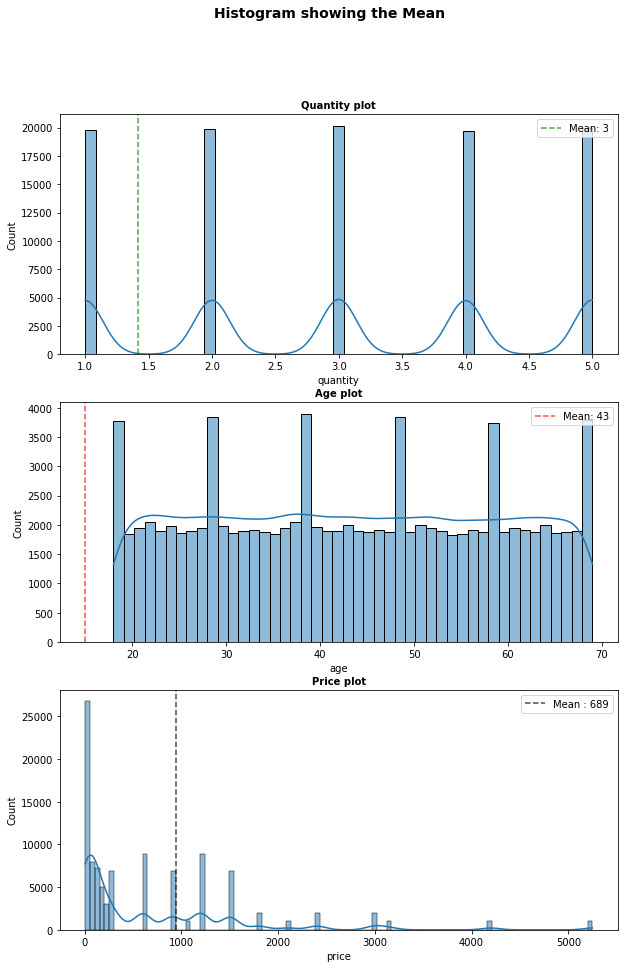

In [35]:
#Create a 2*2 Subplots
fig, axes= plt.subplots(3, figsize= (10,15))
plt.suptitle("Histogram showing the Mean", fontweight= 'bold', fontsize=14)

#Create a Relationship between the values
sns.histplot(df['quantity'],kde=True, ax=axes[0])
axes[0].set_title('Quantity plot', fontsize=10, fontweight= 'bold')
axes[0]. axvline(df['quantity'].std(), linestyle='--', color= 'green', alpha= 0.7, label= f'Mean: {df["quantity"].mean():.0f}')
axes[0]. legend()

sns.histplot(df['age'], ax=axes[1], kde= True) 
axes[1].set_title('Age plot', fontsize=10, fontweight= 'bold')
axes[1].axvline(df['age'].std(), linestyle= '--', color= 'red', alpha=0.7, label= f'Mean: {df["age"]. mean():.0f}')
axes[1]. legend()

sns.histplot(df['price'], kde= True, ax=axes[2])
axes[2].set_title('Price plot', fontweight= 'bold', fontsize=10)
axes[2]. axvline(df['price'].std(), linestyle='--', color= 'black', alpha=0.7,label= f'Mean : {df["price"].mean():.0f}')
axes[2]. legend()

The mean is as follows:
Quantity (3)
Age (43)
Price (689)

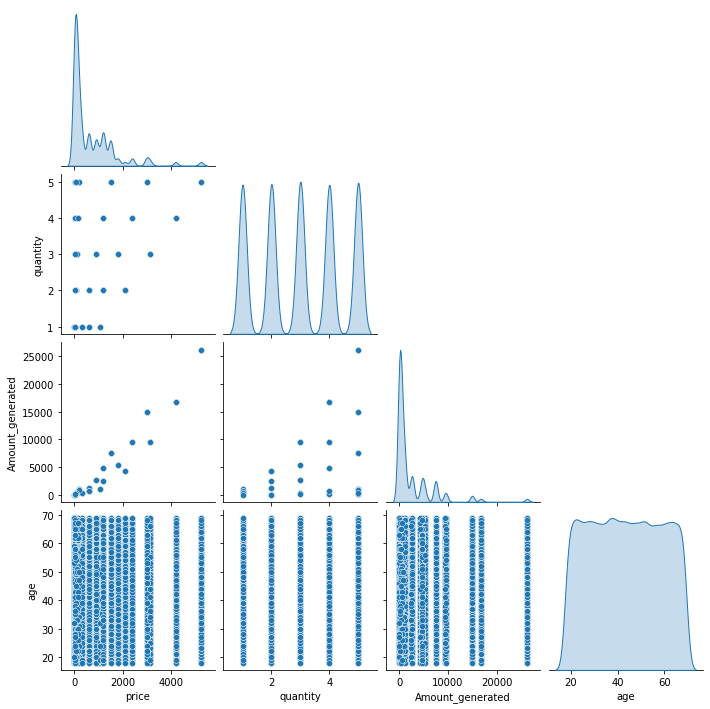

In [36]:
#Select categories by custom count
cols = ["price", "quantity", "Amount_generated", "age"]

sns.pairplot(
    df[cols],
    diag_kind="kde",
    corner=True
)

plt.show()

In [37]:
#Corelation insights age, quantity, price
price_age_corr= df['price'].corr(df['age'])
price_quantity_corr=df['price'].corr(df['quantity'])
quantity_age_corr=df['age'].corr(df['quantity'])

print(f"Price_Age correlation: {price_age_corr:.2f}")
print(f"Price-Quantity correlation: {price_quantity_corr:.2f}")
print(f"Age-Quantity correlation: {quantity_age_corr:.2f}")

Price_Age correlation: 0.00
Price-Quantity correlation: 0.34
Age-Quantity correlation: 0.00


In [38]:
#Key findings category, result
Highest_age= df.loc[df['age']. idxmax()]
Lowest_age=df.loc[df['age']. idxmin()]
Highest_quantity= df.loc[df['quantity']. idxmax()]
Highest_price=df.loc[df['price']. idxmax()]

print(f"Highest age: {Highest_age['category']} {Highest_age['age']} Year")
print(f"Lowest age: {Lowest_age['category']} {Lowest_age['age']} Years")
print(f"Highest_quantity: {Highest_quantity['category']} {Highest_quantity['quantity']} units")
print(f"Lowest price: {Highest_price['category']} {Highest_price['price']}$")

Highest age: Clothing 69 Year
Lowest age: Cosmetics 18 Years
Highest_quantity: Clothing 5 units
Lowest price: Technology 5250.0$


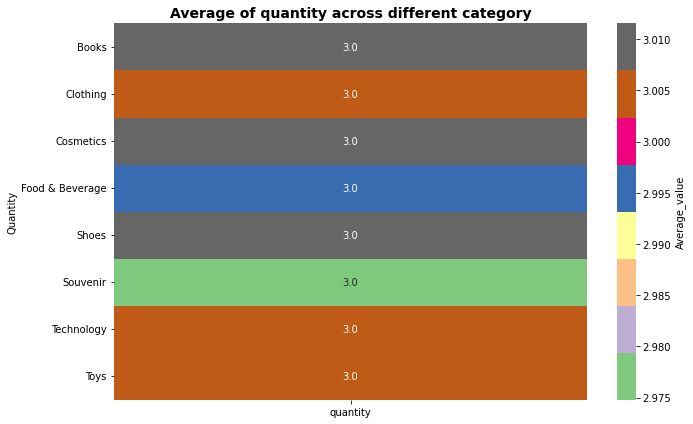

In [39]:
#mean of category in the Menu
category_means=df.groupby('category')['quantity'].mean()

plt.figure(figsize=(10,6))
sns.heatmap(category_means.to_frame(), cmap='Accent', annot= True, fmt='.1f', cbar_kws={'label': 'Average_value'})
plt.title('Average of quantity across different category', fontsize=14, fontweight= 'bold')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

## Answers
 How do sales vary by month, day, and season?
1. The month of January was the peak month and people bought more item in 2022
Customer Demographics: Who are the primary buyers (Age, Gender)?
2. The Older adults are primary buyers compared to the younger adults and teenagers. The barcharts indicate the difference between them. The female spent alot of different items, and even outspending the male in terms of spending power.
Product Performance: Which categories drive the most revenue?
3. The clothing drives the total revenue the most contributing to a large percentage of the amount generated
Behavioral Insights: Is there a correlation between customer age and spending?
4. There is no real relationship between customer age and spending as the correlation value is very small compared to others in the series. But the price and spending has a very high correlation value, indicating that price play a key role in the customer spending.